<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/kmeans_Clustering_tutorial_bodyheight_husband_and_wife_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `K-means Clustering`

Is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. **It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible**. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

We can summarize the algorithm as illustrated below:

1. **Initialization**: directly after starting it, the initial centroids (cluster centers) are chosen.
2. **Centroid assignment**: each sample in the dataset is assigned to the nearest centroid.
3. **Centroid correction**: new centroids are created by computing new means for the assignments created in step 2.
4. **Difference comparison**: for each centroid, the difference between old and new is compared, and the algorithm stops when the difference is lower than a threshold called inertia, or tolerance. Otherwise, it moves back to step 2.

#### **Example: Body Height Dataset**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading dataset body height
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/tinggibadan.csv'
data = pd.read_csv(url, delimiter=';')
data.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


In [6]:
# Renaming columns
data = data.rename(columns={'tinggibadan':'BodyHeight', 'tinggibadanistri':'Wife_BodyHeight'})
data.head()

,BodyHeight,Wife_BodyHeight
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


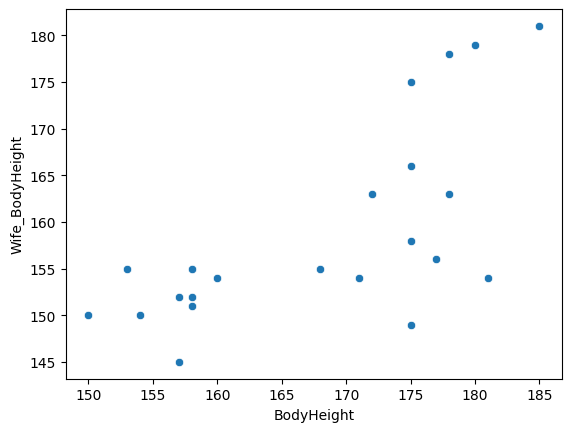

In [9]:
sns.scatterplot(data=data, x='BodyHeight', y='Wife_BodyHeight')
plt.show()

#### **Building a K-means using** `scikit-learn`

We now have all of the pieces to make a K-means using scikit learn library.

In [10]:
from sklearn.preprocessing import StandardScaler

# define features
X = data

# define scaler
scaler = StandardScaler()

# fitting
scaler.fit(X)

# transform
X_scaled = scaler.transform(X)

We initialize sklearn.cluster.KMeans and instruct it to extract two clusters

In [11]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.cluster import KMeans

# define kmeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')

# fitting
kmeans.fit(X)

# evaluation
kmeans.inertia_

1839.7264957264956

In [12]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

Next, we can add the clustering results to the initial dataset and create visualizations to display the results.

In [13]:
data['Cluster n=2'] = kmeans.labels_
data.head()

,BodyHeight,Wife_BodyHeight,Cluster n=2
0,175,175,1
1,178,178,1
2,175,166,1
3,180,179,1
4,185,181,1


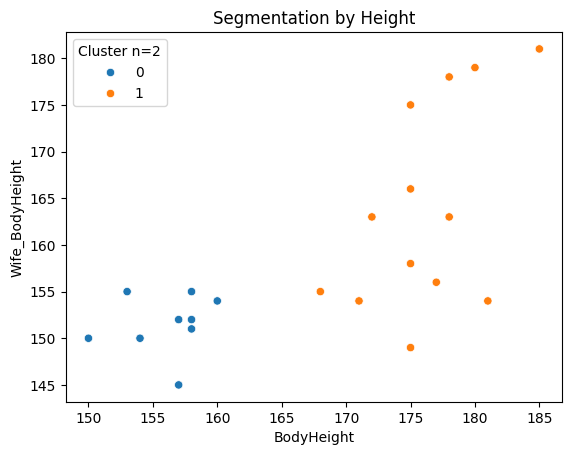

In [14]:
sns.scatterplot(data=data, x='BodyHeight', y='Wife_BodyHeight', hue='Cluster n=2')
plt.title('Segmentation by Height')
plt.show()

`Determine the Optimal Number of Cluster using Elbow Method`

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow

In [15]:
number_of_cluster = range(2, 11)
clusterings = [KMeans(n_clusters=k, random_state=0).fit(X_scaled) for k in number_of_cluster]
clusterings

[KMeans(n_clusters=2, random_state=0),
 KMeans(n_clusters=3, random_state=0),
 KMeans(n_clusters=4, random_state=0),
 KMeans(n_clusters=5, random_state=0),
 KMeans(n_clusters=6, random_state=0),
 KMeans(n_clusters=7, random_state=0),
 KMeans(random_state=0),
 KMeans(n_clusters=9, random_state=0),
 KMeans(n_clusters=10, random_state=0)]

In [16]:
inertia = [model.inertia_ for model in clusterings]

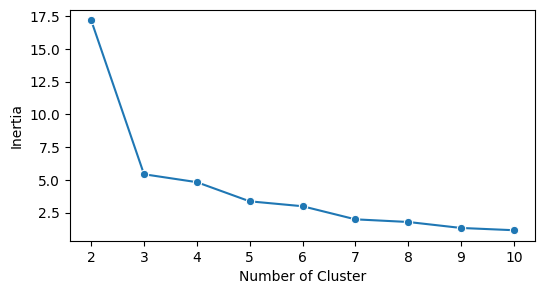

In [17]:
plt.figure(figsize=(6, 3))
sns.lineplot(y=inertia, x=number_of_cluster, marker='o')

plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

# Optimum number of cluster by Elbow Method is 3

`Determine the Optimal Number of Cluster using Silhouette Score`

The silhouette score essentially measures how well data points are grouped within their assigned clusters compared to data points in other clusters.

The silhouette score is calculated for each data point and then averaged across all data points. It considers two distances for each data point:

- a: Average distance between the data point and all other data points within the same cluster (intra-cluster distance).
- b: Distance between the data point and the nearest cluster that the data point doesn’t belong to (inter-cluster distance).
The silhouette score for a data point is then calculated as:

$$\frac{b – a}{max(a, b)}$$

In [18]:
from sklearn.metrics import silhouette_score

score = []
for k in number_of_cluster:
    # define kmeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

    # fitting
    kmeans.fit(X_scaled)

    # evaluate
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels, metric='euclidean')

    score.append(sil_score)

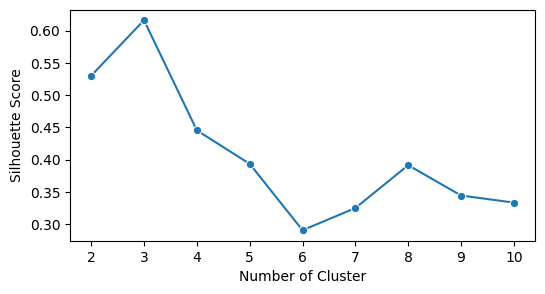

In [19]:
plt.figure(figsize=(6, 3))
sns.lineplot(y=score, x=number_of_cluster, marker='o')

plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Optimum number of cluster by Silhouette Score is 3 # The highest silhoutte score

Now, we will extract three clusters as our final models.

In [20]:
# define final model
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

# fitting
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [21]:
data['Cluster n=3'] = kmeans.labels_
data.head()

,BodyHeight,Wife_BodyHeight,Cluster n=2,Cluster n=3
0,175,175,1,2
1,178,178,1,2
2,175,166,1,1
3,180,179,1,2
4,185,181,1,2


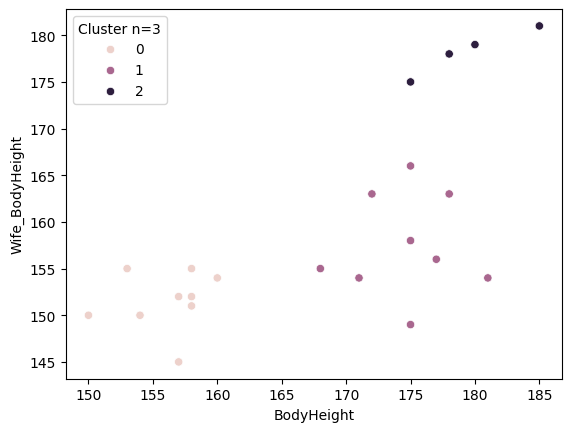

In [22]:
sns.scatterplot(data=data, x='BodyHeight', y='Wife_BodyHeight', hue='Cluster n=3')
plt.show()


3 clusters were formed
- Cluster 0: husband with height < 160 and wife with height < 155 (short husband and short wife)
- Cluster 1: husband with height > 165 and wife with height < 165 (tall husband and short wife)
- Cluster 2: husband with height > 175 and wife with height > 175 (tall husband and tall wife)